In [5]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt


resolution = 20
fcen = 1/0.93
wavl_width = 0.01
nfreq = 50
df = fcen**2*wavl_width
GaAs = mp.Medium(index=3.45)
Sx, Sy, Sz = 2, 2, 2

wg_w = 0.30     # 300nm wide
wg_h = 0.19     # 190nm thick/deep
wg_l = 2.0      # 1um in length

pml_layers = [mp.PML(0.5)]
cell = mp.Vector3(Sx, Sy, Sz)

In [6]:
geometry = [mp.Block(material=mp.air, center=mp.Vector3(0,0,0), size=mp.Vector3(Sx, Sy, Sz)),
            mp.Block(material=GaAs, center=mp.Vector3(0,0,0), size=mp.Vector3(wg_w, wg_l, wg_h)),
            mp.Block(material=GaAs, center=mp.Vector3(0,0,0), size=mp.Vector3(wg_l, wg_w, wg_h))]

source = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=df),
                    component = mp.Ex,
                    center = mp.Vector3(0,0,0),
                    size = mp.Vector3(0,0,0))]

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=source,
                    resolution=resolution)

In [7]:
# flux monitors:
xp_mon = mp.FluxRegion(center=mp.Vector3( 0.3,0,0), size=mp.Vector3(0, 2*wg_w, 2*wg_h))  #previously 0.4x0.4
xm_mon = mp.FluxRegion(center=mp.Vector3(-0.3,0,0), size=mp.Vector3(0, 2*wg_w, 2*wg_h))
xp_flux = sim.add_flux(fcen, df, nfreq, xp_mon)
xm_flux = sim.add_flux(fcen, df, nfreq, xm_mon)

yp_mon = mp.FluxRegion(center=mp.Vector3(0, 0.3,0), size=mp.Vector3(2*wg_w, 0, 2*wg_h))
ym_mon = mp.FluxRegion(center=mp.Vector3(0,-0.3,0), size=mp.Vector3(2*wg_w, 0, 2*wg_h))
yp_flux = sim.add_flux(fcen, df, nfreq, yp_mon)
ym_flux = sim.add_flux(fcen, df, nfreq, ym_mon)

zp_mon = mp.FluxRegion(center=mp.Vector3(0,0, 0.2), size=mp.Vector3(0.6, 0.6, 0))
zm_mon = mp.FluxRegion(center=mp.Vector3(0,0,-0.2), size=mp.Vector3(0.6, 0.6, 0))
zp_flux = sim.add_flux(fcen, df, nfreq, zp_mon)
zm_flux = sim.add_flux(fcen, df, nfreq, zm_mon)


# 2 monitors further into wg, coupling efficiency should be the same when only using the above monitors:
xp_mon2 = mp.FluxRegion(center=mp.Vector3( 0.4,0,0), size=mp.Vector3(0, 2*wg_w, 2*wg_h))
xm_mon2 = mp.FluxRegion(center=mp.Vector3(-0.4,0,0), size=mp.Vector3(0, 2*wg_w, 2*wg_h))
xp_flux2 = sim.add_flux(fcen, df, nfreq, xp_mon2)
xm_flux2 = sim.add_flux(fcen, df, nfreq, xm_mon2)

yp_mon2 = mp.FluxRegion(center=mp.Vector3(0, 0.4,0), size=mp.Vector3(2*wg_w, 0, 2*wg_h))
ym_mon2 = mp.FluxRegion(center=mp.Vector3(0,-0.4,0), size=mp.Vector3(2*wg_w, 0, 2*wg_h))
yp_flux2 = sim.add_flux(fcen, df, nfreq, yp_mon2)
ym_flux2 = sim.add_flux(fcen, df, nfreq, ym_mon2)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000282049 s
Working in 3D dimensions.
Computational cell is 2 x 2 x 2 with resolution 20
     block, center = (0,0,0)
          size (2,2,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.3,2,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,0,0)
          size (2,0.3,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
time for set_epsilon = 0.256808 s
-----------


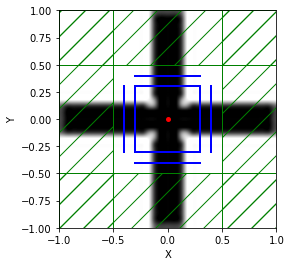

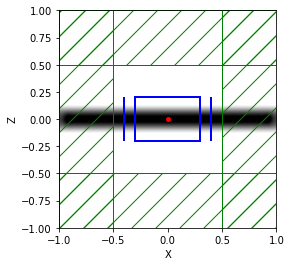

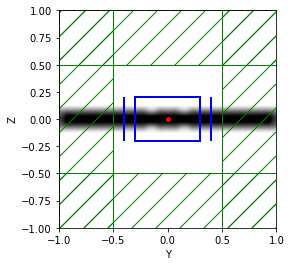

In [8]:
sim.plot2D(plot_boundaries_flag=True, plot_monitors_flag=True, plot_sources_flag=True,
           output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(Sx,Sy,0)))
plt.show()

sim.plot2D(plot_boundaries_flag=True, plot_monitors_flag=True, plot_sources_flag=True,
           output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(Sx,0,Sz)))
plt.show()

sim.plot2D(plot_boundaries_flag=True, plot_monitors_flag=True, plot_sources_flag=True,
           output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(0,Sy,Sz)))
plt.show()

In [ ]:
animate_Ex = mp.Animate2D(sim, fields=mp.Ex, realtime=False)
animate_Ey = mp.Animate2D(sim, fields=mp.Ey, realtime=False)

In [9]:
pt = mp.Vector3(0,0.4,0)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, pt, 1e-3))

on time step 1412 (time=35.3), 0.00283413 s/step
field decay(t = 50.025000000000006): 6.990337075275973e-08 / 6.990337075275973e-08 = 1.0
on time step 2932 (time=73.3), 0.00263304 s/step
field decay(t = 100.05000000000001): 8.300876980417827e-06 / 8.300876980417827e-06 = 1.0
on time step 4474 (time=111.85), 0.00259431 s/step
field decay(t = 150.07500000000002): 0.0005285219575142301 / 0.0005285219575142301 = 1.0
on time step 6017 (time=150.425), 0.00259306 s/step
on time step 7563 (time=189.075), 0.00258812 s/step
field decay(t = 200.10000000000002): 0.016797025301728327 / 0.016797025301728327 = 1.0
on time step 9107 (time=227.675), 0.00259178 s/step
field decay(t = 250.125): 0.27619888199686626 / 0.27619888199686626 = 1.0
on time step 10652 (time=266.3), 0.00258937 s/step
field decay(t = 300.15000000000003): 2.334827912273117 / 2.334827912273117 = 1.0
on time step 12198 (time=304.95), 0.00258758 s/step
on time step 13745 (time=343.625), 0.00258615 s/step
field decay(t = 350.175): 9.97

In [10]:
Pxp = np.array(mp.get_fluxes(xp_flux))
Pxm = np.array(mp.get_fluxes(xm_flux))
Pyp = np.array(mp.get_fluxes(yp_flux))
Pym = np.array(mp.get_fluxes(ym_flux))
Pzp = np.array(mp.get_fluxes(zp_flux))
Pzm = np.array(mp.get_fluxes(zm_flux))
Ptotal = (Pxp-Pxm)+(Pyp-Pym)+(Pzp-Pzm)

# Checking first 4 modes [1,2,3,4]
res_xp = sim.get_eigenmode_coefficients(xp_flux, [1,2,3], eig_parity=mp.NO_PARITY)
res_xm = sim.get_eigenmode_coefficients(xm_flux, [1,2,3], eig_parity=mp.NO_PARITY)
incident_coeffs_xp = np.array(res_xp.alpha)
incident_coeffs_xm = np.array(res_xm.alpha)

res_yp = sim.get_eigenmode_coefficients(yp_flux, [1,2,3], eig_parity=mp.NO_PARITY)
res_ym = sim.get_eigenmode_coefficients(ym_flux, [1,2,3], eig_parity=mp.NO_PARITY)
incident_coeffs_yp = np.array(res_yp.alpha)
incident_coeffs_ym = np.array(res_ym.alpha)
print('Finished Mode Calculation (1)')# so I know when it is finished

MPB solved for frequency_1(3.68973,0,0) = 1.35197 after 26 iters
MPB solved for frequency_1(2.60012,0,0) = 1.07488 after 12 iters
MPB solved for frequency_1(2.57848,0,0) = 1.06949 after 9 iters
MPB solved for frequency_1(2.57847,0,0) = 1.06949 after 2 iters
Dominant planewave for band 1: (2.578475,-0.000000,0.000000)
MPB solved for frequency_1(2.57942,0,0) = 1.06972 after 23 iters
MPB solved for frequency_1(2.57942,0,0) = 1.06972 after 1 iters
Dominant planewave for band 1: (2.579422,-0.000000,0.000000)
MPB solved for frequency_1(2.58037,0,0) = 1.06996 after 23 iters
MPB solved for frequency_1(2.58037,0,0) = 1.06996 after 1 iters
Dominant planewave for band 1: (2.580369,-0.000000,0.000000)
MPB solved for frequency_1(2.58132,0,0) = 1.0702 after 23 iters
MPB solved for frequency_1(2.58132,0,0) = 1.0702 after 1 iters
Dominant planewave for band 1: (2.581316,-0.000000,0.000000)
MPB solved for frequency_1(2.58226,0,0) = 1.07043 after 23 iters
MPB solved for frequency_1(2.58226,0,0) = 1.0704

Dominant planewave for band 1: (2.618230,-0.000000,0.000000)
MPB solved for frequency_1(2.61918,0,0) = 1.07963 after 23 iters
MPB solved for frequency_1(2.61918,0,0) = 1.07963 after 1 iters
Dominant planewave for band 1: (2.619176,-0.000000,0.000000)
MPB solved for frequency_1(2.62012,0,0) = 1.07987 after 23 iters
MPB solved for frequency_1(2.62012,0,0) = 1.07987 after 1 iters
Dominant planewave for band 1: (2.620122,-0.000000,0.000000)
MPB solved for frequency_1(2.62107,0,0) = 1.08011 after 23 iters
MPB solved for frequency_1(2.62107,0,0) = 1.08011 after 1 iters
Dominant planewave for band 1: (2.621068,-0.000000,0.000000)
MPB solved for frequency_1(2.62201,0,0) = 1.08034 after 23 iters
MPB solved for frequency_1(2.62201,0,0) = 1.08034 after 1 iters
Dominant planewave for band 1: (2.622014,-0.000000,0.000000)
MPB solved for frequency_1(2.62296,0,0) = 1.08058 after 23 iters
MPB solved for frequency_1(2.62296,0,0) = 1.08058 after 1 iters
Dominant planewave for band 1: (2.622960,-0.000000

MPB solved for frequency_2(1.92256,0,0) = 1.07775 after 21 iters
MPB solved for frequency_2(1.92256,0,0) = 1.07775 after 1 iters
Dominant planewave for band 2: (1.922556,-0.000000,0.000000)
MPB solved for frequency_2(1.92348,0,0) = 1.07798 after 21 iters
MPB solved for frequency_2(1.92348,0,0) = 1.07798 after 1 iters
Dominant planewave for band 2: (1.923478,-0.000000,0.000000)
MPB solved for frequency_2(1.9244,0,0) = 1.07822 after 21 iters
MPB solved for frequency_2(1.9244,0,0) = 1.07822 after 1 iters
Dominant planewave for band 2: (1.924400,-0.000000,0.000000)
MPB solved for frequency_2(1.92532,0,0) = 1.07845 after 21 iters
MPB solved for frequency_2(1.92532,0,0) = 1.07845 after 1 iters
Dominant planewave for band 2: (1.925322,-0.000000,0.000000)
MPB solved for frequency_2(1.92624,0,0) = 1.07869 after 21 iters
MPB solved for frequency_2(1.92625,0,0) = 1.07869 after 1 iters
Dominant planewave for band 2: (1.926245,-0.000000,0.000000)
MPB solved for frequency_2(1.92717,0,0) = 1.07893 af

Dominant planewave for band 3: (0.983935,-0.000000,0.000000)
MPB solved for frequency_3(0.984337,0,0) = 1.07586 after 40 iters
MPB solved for frequency_3(0.984337,0,0) = 1.07586 after 1 iters
Dominant planewave for band 3: (0.984337,-0.000000,0.000000)
MPB solved for frequency_3(0.98474,0,0) = 1.07609 after 40 iters
MPB solved for frequency_3(0.98474,0,0) = 1.07609 after 1 iters
Dominant planewave for band 3: (0.984740,-0.000000,0.000000)
MPB solved for frequency_3(0.985142,0,0) = 1.07633 after 40 iters
MPB solved for frequency_3(0.985142,0,0) = 1.07633 after 1 iters
Dominant planewave for band 3: (0.985142,-0.000000,0.000000)
MPB solved for frequency_3(0.985544,0,0) = 1.07657 after 40 iters
MPB solved for frequency_3(0.985544,0,0) = 1.07657 after 1 iters
Dominant planewave for band 3: (0.985544,-0.000000,0.000000)
MPB solved for frequency_3(0.985946,0,0) = 1.0768 after 40 iters
MPB solved for frequency_3(0.985946,0,0) = 1.0768 after 1 iters
Dominant planewave for band 3: (0.985946,-0.

MPB solved for frequency_1(2.59647,0,0) = 1.07397 after 1 iters
Dominant planewave for band 1: (2.596466,-0.000000,0.000000)
MPB solved for frequency_1(2.59741,0,0) = 1.07421 after 23 iters
MPB solved for frequency_1(2.59741,0,0) = 1.07421 after 1 iters
Dominant planewave for band 1: (2.597412,-0.000000,0.000000)
MPB solved for frequency_1(2.59836,0,0) = 1.07444 after 23 iters
MPB solved for frequency_1(2.59836,0,0) = 1.07444 after 1 iters
Dominant planewave for band 1: (2.598359,-0.000000,0.000000)
MPB solved for frequency_1(2.59931,0,0) = 1.07468 after 23 iters
MPB solved for frequency_1(2.59931,0,0) = 1.07468 after 1 iters
Dominant planewave for band 1: (2.599306,-0.000000,0.000000)
MPB solved for frequency_1(2.60025,0,0) = 1.07491 after 23 iters
MPB solved for frequency_1(2.60025,0,0) = 1.07491 after 1 iters
Dominant planewave for band 1: (2.600252,-0.000000,0.000000)
MPB solved for frequency_1(2.6012,0,0) = 1.07515 after 23 iters
MPB solved for frequency_1(2.6012,0,0) = 1.07515 af

Dominant planewave for band 2: (1.900516,-0.000000,0.000000)
MPB solved for frequency_2(1.90143,0,0) = 1.07232 after 21 iters
MPB solved for frequency_2(1.90143,0,0) = 1.07232 after 1 iters
Dominant planewave for band 2: (1.901431,-0.000000,0.000000)
MPB solved for frequency_2(1.90235,0,0) = 1.07256 after 21 iters
MPB solved for frequency_2(1.90235,0,0) = 1.07256 after 1 iters
Dominant planewave for band 2: (1.902346,-0.000000,0.000000)
MPB solved for frequency_2(1.90326,0,0) = 1.07279 after 21 iters
MPB solved for frequency_2(1.90326,0,0) = 1.07279 after 1 iters
Dominant planewave for band 2: (1.903262,-0.000000,0.000000)
MPB solved for frequency_2(1.90418,0,0) = 1.07303 after 21 iters
MPB solved for frequency_2(1.90418,0,0) = 1.07303 after 1 iters
Dominant planewave for band 2: (1.904178,-0.000000,0.000000)
MPB solved for frequency_2(1.90509,0,0) = 1.07326 after 21 iters
MPB solved for frequency_2(1.90509,0,0) = 1.07326 after 1 iters
Dominant planewave for band 2: (1.905094,-0.000000

Dominant planewave for band 3: (0.974642,1.666667,0.000000)
MPB solved for frequency_3(0.975048,0,0) = 1.07043 after 38 iters
MPB solved for frequency_3(0.975048,0,0) = 1.07043 after 1 iters
Dominant planewave for band 3: (0.975048,1.666667,0.000000)
MPB solved for frequency_3(0.975453,0,0) = 1.07067 after 39 iters
MPB solved for frequency_3(0.975453,0,0) = 1.07067 after 1 iters
Dominant planewave for band 3: (0.975453,1.666667,0.000000)
MPB solved for frequency_3(0.975858,0,0) = 1.0709 after 39 iters
MPB solved for frequency_3(0.975858,0,0) = 1.0709 after 1 iters
Dominant planewave for band 3: (0.975858,1.666667,0.000000)
MPB solved for frequency_3(0.976263,0,0) = 1.07114 after 39 iters
MPB solved for frequency_3(0.976263,0,0) = 1.07114 after 1 iters
Dominant planewave for band 3: (0.976263,1.666667,0.000000)
MPB solved for frequency_3(0.976668,0,0) = 1.07138 after 39 iters
MPB solved for frequency_3(0.976668,0,0) = 1.07138 after 1 iters
Dominant planewave for band 3: (0.976668,1.6666

Dominant planewave for band 3: (0.991962,-0.000000,0.000000)
MPB solved for frequency_3(0.992362,0,0) = 1.08058 after 41 iters
MPB solved for frequency_3(0.992362,0,0) = 1.08058 after 1 iters
Dominant planewave for band 3: (0.992362,-0.000000,0.000000)
MPB solved for frequency_3(0.992762,0,0) = 1.08081 after 41 iters
MPB solved for frequency_3(0.992762,0,0) = 1.08081 after 1 iters
Dominant planewave for band 3: (0.992762,-0.000000,0.000000)
MPB solved for frequency_3(0.993162,0,0) = 1.08105 after 41 iters
MPB solved for frequency_3(0.993162,0,0) = 1.08105 after 1 iters
Dominant planewave for band 3: (0.993162,-0.000000,0.000000)
MPB solved for frequency_1(0,3.68973,0) = 1.35197 after 26 iters
MPB solved for frequency_1(0,2.60012,0) = 1.07488 after 12 iters
MPB solved for frequency_1(0,2.57848,0) = 1.06949 after 9 iters
MPB solved for frequency_1(0,2.57847,0) = 1.06949 after 2 iters
Dominant planewave for band 1: (0.000000,2.578475,0.000000)
MPB solved for frequency_1(0,2.57942,0) = 1.0

Dominant planewave for band 1: (0.000000,2.615392,0.000000)
MPB solved for frequency_1(0,2.61634,0) = 1.07893 after 23 iters
MPB solved for frequency_1(0,2.61634,0) = 1.07893 after 1 iters
Dominant planewave for band 1: (0.000000,2.616339,0.000000)
MPB solved for frequency_1(0,2.61728,0) = 1.07916 after 23 iters
MPB solved for frequency_1(0,2.61728,0) = 1.07916 after 1 iters
Dominant planewave for band 1: (0.000000,2.617284,0.000000)
MPB solved for frequency_1(0,2.61823,0) = 1.0794 after 23 iters
MPB solved for frequency_1(0,2.61823,0) = 1.0794 after 1 iters
Dominant planewave for band 1: (0.000000,2.618230,0.000000)
MPB solved for frequency_1(0,2.61918,0) = 1.07963 after 23 iters
MPB solved for frequency_1(0,2.61918,0) = 1.07963 after 1 iters
Dominant planewave for band 1: (0.000000,2.619176,0.000000)
MPB solved for frequency_1(0,2.62012,0) = 1.07987 after 23 iters
MPB solved for frequency_1(0,2.62012,0) = 1.07987 after 1 iters
Dominant planewave for band 1: (0.000000,2.620122,0.00000

MPB solved for frequency_2(0,1.91979,0) = 1.07704 after 1 iters
Dominant planewave for band 2: (0.000000,1.919792,0.000000)
MPB solved for frequency_2(0,1.92071,0) = 1.07727 after 22 iters
MPB solved for frequency_2(0,1.92071,0) = 1.07727 after 1 iters
Dominant planewave for band 2: (0.000000,1.920713,0.000000)
MPB solved for frequency_2(0,1.92163,0) = 1.07751 after 22 iters
MPB solved for frequency_2(0,1.92163,0) = 1.07751 after 1 iters
Dominant planewave for band 2: (0.000000,1.921634,0.000000)
MPB solved for frequency_2(0,1.92256,0) = 1.07775 after 22 iters
MPB solved for frequency_2(0,1.92256,0) = 1.07775 after 1 iters
Dominant planewave for band 2: (0.000000,1.922556,0.000000)
MPB solved for frequency_2(0,1.92348,0) = 1.07798 after 22 iters
MPB solved for frequency_2(0,1.92348,0) = 1.07798 after 1 iters
Dominant planewave for band 2: (0.000000,1.923478,0.000000)
MPB solved for frequency_2(0,1.9244,0) = 1.07822 after 22 iters
MPB solved for frequency_2(0,1.9244,0) = 1.07822 after 1

MPB solved for frequency_3(0,0.98313,0) = 1.07515 after 1 iters
Dominant planewave for band 3: (0.000000,0.983130,0.000000)
MPB solved for frequency_3(0,0.983532,0) = 1.07539 after 36 iters
MPB solved for frequency_3(0,0.983532,0) = 1.07539 after 1 iters
Dominant planewave for band 3: (0.000000,0.983532,0.000000)
MPB solved for frequency_3(0,0.983935,0) = 1.07562 after 36 iters
MPB solved for frequency_3(0,0.983935,0) = 1.07562 after 1 iters
Dominant planewave for band 3: (0.000000,0.983935,0.000000)
MPB solved for frequency_3(0,0.984337,0) = 1.07586 after 36 iters
MPB solved for frequency_3(0,0.984337,0) = 1.07586 after 1 iters
Dominant planewave for band 3: (0.000000,0.984337,0.000000)
MPB solved for frequency_3(0,0.98474,0) = 1.07609 after 37 iters
MPB solved for frequency_3(0,0.98474,0) = 1.07609 after 1 iters
Dominant planewave for band 3: (0.000000,0.984740,0.000000)
MPB solved for frequency_3(0,0.985142,0) = 1.07633 after 37 iters
MPB solved for frequency_3(0,0.985142,0) = 1.076

MPB solved for frequency_1(0,2.59457,0) = 1.0735 after 23 iters
MPB solved for frequency_1(0,2.59457,0) = 1.0735 after 1 iters
Dominant planewave for band 1: (0.000000,2.594573,0.000000)
MPB solved for frequency_1(0,2.59552,0) = 1.07374 after 23 iters
MPB solved for frequency_1(0,2.59552,0) = 1.07374 after 1 iters
Dominant planewave for band 1: (0.000000,2.595519,0.000000)
MPB solved for frequency_1(0,2.59647,0) = 1.07397 after 23 iters
MPB solved for frequency_1(0,2.59647,0) = 1.07397 after 1 iters
Dominant planewave for band 1: (0.000000,2.596466,0.000000)
MPB solved for frequency_1(0,2.59741,0) = 1.07421 after 23 iters
MPB solved for frequency_1(0,2.59741,0) = 1.07421 after 1 iters
Dominant planewave for band 1: (0.000000,2.597412,0.000000)
MPB solved for frequency_1(0,2.59836,0) = 1.07444 after 23 iters
MPB solved for frequency_1(0,2.59836,0) = 1.07444 after 1 iters
Dominant planewave for band 1: (0.000000,2.598359,0.000000)
MPB solved for frequency_1(0,2.59931,0) = 1.07468 after 2

Dominant planewave for band 2: (0.000000,1.898687,0.000000)
MPB solved for frequency_2(0,1.8996,0) = 1.07185 after 21 iters
MPB solved for frequency_2(0,1.8996,0) = 1.07185 after 1 iters
Dominant planewave for band 2: (0.000000,1.899601,0.000000)
MPB solved for frequency_2(0,1.90052,0) = 1.07208 after 21 iters
MPB solved for frequency_2(0,1.90052,0) = 1.07208 after 1 iters
Dominant planewave for band 2: (0.000000,1.900516,0.000000)
MPB solved for frequency_2(0,1.90143,0) = 1.07232 after 21 iters
MPB solved for frequency_2(0,1.90143,0) = 1.07232 after 1 iters
Dominant planewave for band 2: (0.000000,1.901431,0.000000)
MPB solved for frequency_2(0,1.90235,0) = 1.07256 after 21 iters
MPB solved for frequency_2(0,1.90235,0) = 1.07256 after 1 iters
Dominant planewave for band 2: (0.000000,1.902346,0.000000)
MPB solved for frequency_2(0,1.90326,0) = 1.07279 after 21 iters
MPB solved for frequency_2(0,1.90326,0) = 1.07279 after 1 iters
Dominant planewave for band 2: (0.000000,1.903262,0.00000

MPB solved for frequency_3(0,0.974237,0) = 1.06996 after 36 iters
MPB solved for frequency_3(0,0.974237,0) = 1.06996 after 1 iters
Dominant planewave for band 3: (1.666667,0.974237,0.000000)
MPB solved for frequency_3(0,0.974642,0) = 1.0702 after 36 iters
MPB solved for frequency_3(0,0.974642,0) = 1.0702 after 1 iters
Dominant planewave for band 3: (1.666667,0.974642,0.000000)
MPB solved for frequency_3(0,0.975048,0) = 1.07043 after 36 iters
MPB solved for frequency_3(0,0.975048,0) = 1.07043 after 1 iters
Dominant planewave for band 3: (1.666667,0.975048,0.000000)
MPB solved for frequency_3(0,0.975453,0) = 1.07067 after 36 iters
MPB solved for frequency_3(0,0.975453,0) = 1.07067 after 1 iters
Dominant planewave for band 3: (1.666667,0.975453,0.000000)
MPB solved for frequency_3(0,0.975858,0) = 1.0709 after 36 iters
MPB solved for frequency_3(0,0.975858,0) = 1.0709 after 1 iters
Dominant planewave for band 3: (1.666667,0.975858,0.000000)
MPB solved for frequency_3(0,0.976263,0) = 1.0711

MPB solved for frequency_3(0,0.991561,0) = 1.08011 after 1 iters
Dominant planewave for band 3: (0.000000,0.991561,0.000000)
MPB solved for frequency_3(0,0.991962,0) = 1.08034 after 38 iters
MPB solved for frequency_3(0,0.991962,0) = 1.08034 after 1 iters
Dominant planewave for band 3: (0.000000,0.991962,0.000000)
MPB solved for frequency_3(0,0.992362,0) = 1.08058 after 38 iters
MPB solved for frequency_3(0,0.992362,0) = 1.08058 after 1 iters
Dominant planewave for band 3: (0.000000,0.992362,0.000000)
MPB solved for frequency_3(0,0.992762,0) = 1.08081 after 38 iters
MPB solved for frequency_3(0,0.992762,0) = 1.08081 after 1 iters
Dominant planewave for band 3: (0.000000,0.992762,0.000000)
MPB solved for frequency_3(0,0.993162,0) = 1.08105 after 38 iters
MPB solved for frequency_3(0,0.993162,0) = 1.08105 after 1 iters
Dominant planewave for band 3: (0.000000,0.993162,0.000000)
Finished Mode Calculation (1)


In [ ]:
# same thing using the alternate monitors further into wg
'''
res_x2 = sim.get_eigenmode_coefficients(xp_flux2, [1,2,3,4], eig_parity=mp.NO_PARITY)
incident_coeffs_x2 = np.array(res_x2.alpha)

res_y2 = sim.get_eigenmode_coefficients(yp_flux2, [1,2,3,4], eig_parity=mp.NO_PARITY)
incident_coeffs_y2 = np.array(res_y2.alpha)
print('Finished Mode Calculation (2)')
'''

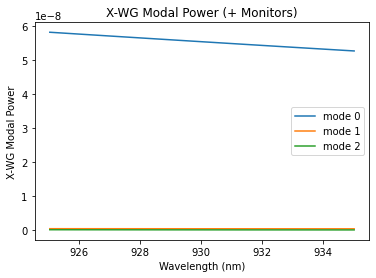

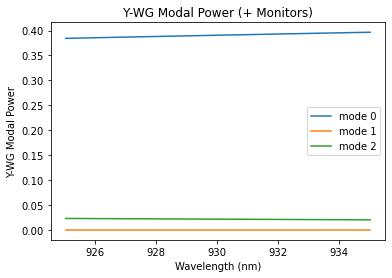

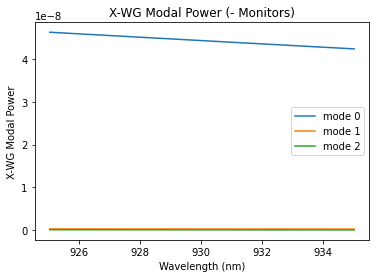

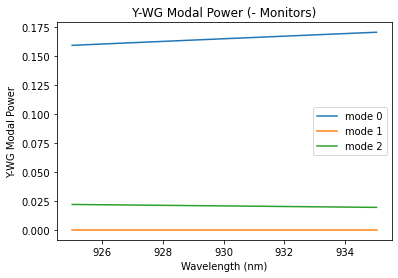

In [11]:
wavl = 1/np.array(mp.get_flux_freqs(xp_flux)) * 1000 # convert to nm

modal_power_xp = abs(incident_coeffs_xp)**2  #np.abs() takes complex modulus
modal_power_yp = abs(incident_coeffs_yp)**2

modal_power_xm = abs(incident_coeffs_xm)**2
modal_power_ym = abs(incident_coeffs_ym)**2

#modal_power_x2 = abs(incident_coeffs_x2)**2
#modal_power_y2 = abs(incident_coeffs_y2)**2


plt.figure(1) 
plt.title('X-WG Modal Power (+ Monitors)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('X-WG Modal Power')
# power plot for x-wg (using just flux box)
# last argument in [#,#,#] is prop. direction (0=forward(+), 1=backward(-))
plt.plot(wavl, modal_power_xp[0,:,0]/Ptotal,
         wavl, modal_power_xp[1,:,0]/Ptotal,
         wavl, modal_power_xp[2,:,0]/Ptotal)
plt.legend(['mode 0', 'mode 1', 'mode 2', 'mode 3'])

plt.figure(2)
plt.title('Y-WG Modal Power (+ Monitors)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Y-WG Modal Power')
# power plot for y-wg (using just flux box)
plt.plot(wavl, modal_power_yp[0,:,0]/Ptotal,
         wavl, modal_power_yp[1,:,0]/Ptotal,
         wavl, modal_power_yp[2,:,0]/Ptotal)
plt.legend(['mode 0', 'mode 1', 'mode 2', 'mode 3'])

plt.figure(3)
plt.title('X-WG Modal Power (- Monitors)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('X-WG Modal Power')
# power plot for x-wg (using the negative direction monitors)
plt.plot(wavl, modal_power_xm[0,:,1]/Ptotal,
         wavl, modal_power_xm[1,:,1]/Ptotal,
         wavl, modal_power_xm[2,:,1]/Ptotal)
plt.legend(['mode 0', 'mode 1', 'mode 2', 'mode 3'])

plt.figure(4)
plt.title('Y-WG Modal Power (- Monitors)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Y-WG Modal Power')
# power plot for y-wg (using the negative direction monitors)
plt.plot(wavl, modal_power_ym[0,:,1]/Ptotal,
         wavl, modal_power_ym[1,:,1]/Ptotal,
         wavl, modal_power_ym[2,:,1]/Ptotal)
plt.legend(['mode 0', 'mode 1', 'mode 2', 'mode 3'])

In [ ]:
print(xp_flux.where)
print(yp_flux.where)

In [ ]:
# trying to visualize Eigenmode Data:
# looking at first 3 modes in each waveguide (xwg & ywg)
mode0_xwg = sim.get_eigenmode(frequency=fcen, direction=mp.X, kpoint=mp.Vector3(0,0,0), where=xp_flux.where, band_num=1, parity=mp.NO_PARITY)
mode0_ywg = sim.get_eigenmode(frequency=fcen, direction=mp.Y, kpoint=mp.Vector3(0,0,0), where=yp_flux.where, band_num=1, parity=mp.NO_PARITY)

mode1_xwg = sim.get_eigenmode(frequency=fcen, direction=mp.X, kpoint=mp.Vector3(0,0,0), where=xp_flux.where, band_num=2, parity=mp.NO_PARITY)
mode1_ywg = sim.get_eigenmode(frequency=fcen, direction=mp.Y, kpoint=mp.Vector3(0,0,0), where=yp_flux.where, band_num=2, parity=mp.NO_PARITY)

mode2_xwg = sim.get_eigenmode(frequency=fcen, direction=mp.X, kpoint=mp.Vector3(0,0,0), where=xp_flux.where, band_num=3, parity=mp.NO_PARITY)
mode2_ywg = sim.get_eigenmode(frequency=fcen, direction=mp.Y, kpoint=mp.Vector3(0,0,0), where=yp_flux.where, band_num=3, parity=mp.NO_PARITY)

In [ ]:
# Mode visualization

n=50
mon_dist = 0.3  # how far into wg the monitor is, 0.3 for inner monitors
mode = 0   # change this to specific mode you want to plot (only 0, 1, or 2 for now)

x_arr = np.linspace(-wg_w, +wg_w, n)
y_arr = np.linspace(-wg_w, +wg_w, n)
z_arr = np.linspace(-wg_h, +wg_h, n)
#print(y_arr)
#print(z_arr)

# want 2D arrays to store amp of E @ each point. 1D now, reshape later
Ex_ywg = []   #Ex amplitudes in y waveguide mode
Ex_xwg = []   #Ex amplitudes in x waveguide mode

Ey_xwg = []   #Ey amplitudes in x waveguide mode
Ey_ywg = []   #Ey amplitudes in y waveguide mode

# eigenmodeData for y-wg crosssection (looking at Ex & Ey fields)
for pt_z in z_arr:
    for pt_x in x_arr:
        point = mp.Vector3(pt_x, 0.3, pt_z)  #y=0.3 is yp monitor location
        if mode==0:
            Ex_ywg.append(mode0_ywg.amplitude(point, mp.Ex).real)
            Ey_ywg.append(mode0_ywg.amplitude(point, mp.Ey).real)
        elif mode==1:
            Ex_ywg.append(mode1_ywg.amplitude(point, mp.Ex).real)
            Ey_ywg.append(mode1_ywg.amplitude(point, mp.Ey).real)
        elif mode==2:
            Ex_ywg.append(mode2_ywg.amplitude(point, mp.Ex).real)
            Ey_ywg.append(mode2_ywg.amplitude(point, mp.Ey).real)
np.asarray(Ex_ywg)
np.asarray(Ey_ywg)
Ex_ywg = np.reshape(Ex_ywg, (n,n))
Ey_ywg = np.reshape(Ey_ywg, (n,n))

# eigenmodeData for x-wg crosssection (looking at Ex & Ey fields)
for pt_z in z_arr:
    for pt_y in y_arr:
        point = mp.Vector3(0.3, pt_y, pt_z)
        if mode==0:
            title = 'mode0'
            Ex_xwg.append(mode0_xwg.amplitude(point, mp.Ex).real)
            Ey_xwg.append(mode0_xwg.amplitude(point, mp.Ey).real)
        elif mode==1:
            title = 'mode1'
            Ex_xwg.append(mode1_xwg.amplitude(point, mp.Ex).real)
            Ey_xwg.append(mode1_xwg.amplitude(point, mp.Ey).real)
        elif mode==2:
            title = 'mode2'
            Ex_xwg.append(mode2_xwg.amplitude(point, mp.Ex).real)
            Ey_xwg.append(mode2_xwg.amplitude(point, mp.Ey).real)
np.asarray(Ey_xwg)
np.asarray(Ex_xwg)
Ex_xwg = np.reshape(Ex_xwg, (n,n))
Ey_xwg = np.reshape(Ey_xwg, (n,n))


# Ex in y-wg
plt.figure(5)
plt.imshow(Ex_ywg, extent=[-wg_w, wg_w, -wg_h, wg_h])
plt.title(title+'; Ex in Y-wg')
plt.xlabel('x (\u03BCm)')
plt.ylabel('z (\u03BCm)')
plt.colorbar()
# adding wg outline:
plt.plot([-wg_w/2,wg_w/2], [wg_h/2, wg_h/2], 'r-')
plt.plot([-wg_w/2,wg_w/2], [-wg_h/2, -wg_h/2], 'r-')
plt.plot([-wg_w/2, -wg_w/2], [wg_h/2, -wg_h/2], 'r-')
plt.plot([wg_w/2, wg_w/2], [wg_h/2, -wg_h/2], 'r-')

# Ey in x-wg
plt.figure(6)
plt.imshow(Ey_xwg, extent=[-wg_w, wg_w, -wg_h, wg_h])
plt.title(title+'; Ey in X-wg')
plt.xlabel('y (\u03BCm)')
plt.ylabel('z (\u03BCm)')
plt.colorbar()
plt.plot([-wg_w/2,wg_w/2], [wg_h/2, wg_h/2], 'r-')
plt.plot([-wg_w/2,wg_w/2], [-wg_h/2, -wg_h/2], 'r-')
plt.plot([-wg_w/2, -wg_w/2], [wg_h/2, -wg_h/2], 'r-')
plt.plot([wg_w/2, wg_w/2], [wg_h/2, -wg_h/2], 'r-')

# Ey in y-wg
plt.figure(7)
plt.imshow(Ey_ywg, extent=[-wg_w, wg_w, -wg_h, wg_h])
plt.title(title+'; Ey in Y-wg')
plt.xlabel('x (\u03BCm)')
plt.ylabel('z (\u03BCm)')
plt.colorbar()
plt.plot([-wg_w/2,wg_w/2], [wg_h/2, wg_h/2], 'r-')
plt.plot([-wg_w/2,wg_w/2], [-wg_h/2, -wg_h/2], 'r-')
plt.plot([-wg_w/2, -wg_w/2], [wg_h/2, -wg_h/2], 'r-')
plt.plot([wg_w/2, wg_w/2], [wg_h/2, -wg_h/2], 'r-')

# Ex in x-wg
plt.figure(8)
plt.imshow(Ex_xwg, extent=[-wg_w, wg_w, -wg_h, wg_h])
plt.title(title+'; Ex in X-wg')
plt.xlabel('y (\u03BCm)')
plt.ylabel('z (\u03BCm)')
plt.colorbar()
plt.plot([-wg_w/2,wg_w/2], [wg_h/2, wg_h/2], 'r-')
plt.plot([-wg_w/2,wg_w/2], [-wg_h/2, -wg_h/2], 'r-')
plt.plot([-wg_w/2, -wg_w/2], [wg_h/2, -wg_h/2], 'r-')
plt.plot([wg_w/2, wg_w/2], [wg_h/2, -wg_h/2], 'r-')


In [ ]:
# making sequence of mode plots:
y_slices = [0.05, 0.1, 0.15, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
mode = 0
Ex_ywg = []   #Ex amplitudes in y waveguide mode
Ey_ywg = []

# same as above, but now pt is shifted along y each time (looking at y-wg)
i=0
for pt_y in y_slices:
    print(pt_y)
    for pt_z in z_arr:
        for pt_x in x_arr:
            point = mp.Vector3(pt_x, pt_y, pt_z)
            if mode==0:
                Ex_ywg.append(mode0_ywg.amplitude(point, mp.Ex).real)
                Ey_ywg.append(mode0_ywg.amplitude(point, mp.Ey).real)
            elif mode==1:
                Ex_ywg.append(mode1_ywg.amplitude(point, mp.Ex).real)
                Ey_ywg.append(mode1_ywg.amplitude(point, mp.Ey).real)
            elif mode==2:
                Ex_ywg.append(mode2_ywg.amplitude(point, mp.Ex).real)
                Ey_ywg.append(mode2_ywg.amplitude(point, mp.Ey).real)
    # need to produce each plot @ each pt_y:
    np.asarray(Ex_ywg)
    np.asarray(Ey_ywg)
    Ex_ywg = np.reshape(Ex_ywg, (n,n))
    Ey_ywg = np.reshape(Ex_ywg, (n,n))
    plt.figure(i)
    plt.imshow(Ex_ywg, extent=[-wg_w, wg_w, -wg_h, wg_h])
    plt.title(title+'; Ex in Y-wg; y='+str(pt_y))
    plt.xlabel('y (\u03BCm)')
    plt.ylabel('z (\u03BCm)')
    plt.colorbar()
    plt.plot([-wg_w/2,wg_w/2], [wg_h/2, wg_h/2], 'r-')
    plt.plot([-wg_w/2,wg_w/2], [-wg_h/2, -wg_h/2], 'r-')
    plt.plot([-wg_w/2, -wg_w/2], [wg_h/2, -wg_h/2], 'r-')
    plt.plot([wg_w/2, wg_w/2], [wg_h/2, -wg_h/2], 'r-')
    i=i+1
    # reset the arrays for next plot:
    Ex_ywg = []
    Ey_ywg = []
    